<a href="https://colab.research.google.com/github/MockingJay09/Digit-Recognition/blob/main/MNIST_Digit_Recognition_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting my google drive into colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#obtaining data

train = pd.read_csv("/content/drive/MyDrive/AI-MINOR-APRIL/train.csv")
test = pd.read_csv("/content/drive/MyDrive/AI-MINOR-APRIL/test.csv")

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop('label', axis=1)
y = train.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train = X_train.values.reshape(-1,28, 28)
X_test = X_test.values.reshape(-1, 28, 28)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(37800, 28, 28)
(37800,)
(4200, 28, 28)
(4200,)


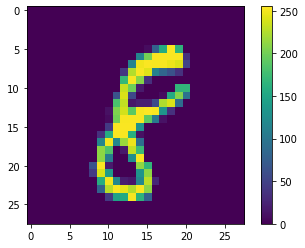

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

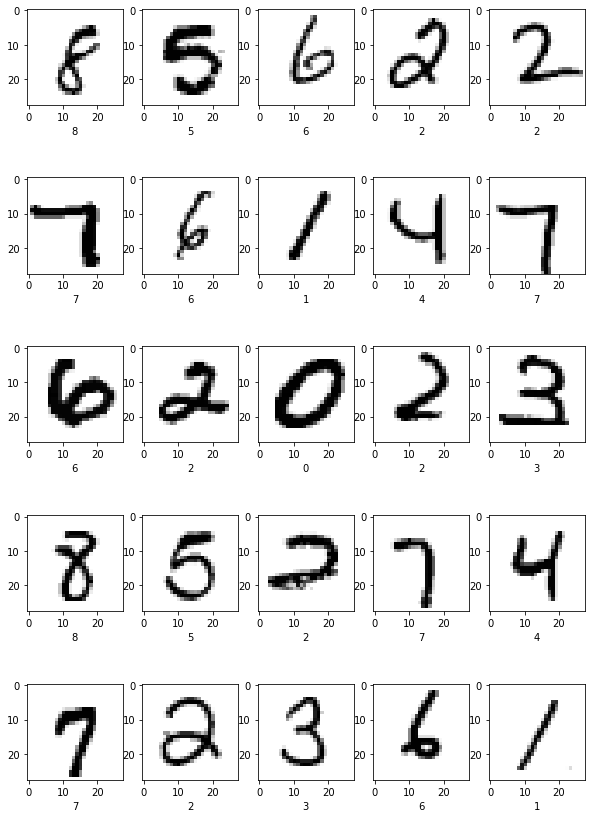

In [ ]:
plt.figure(figsize=(10, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train.iloc[i])

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam 

model = Sequential([Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dropout(0.2), Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1182/1182 [==============================] - 9s 6ms/step - loss: 0.3392 - accuracy: 0.9003 - val_loss: 0.1902 - val_accuracy: 0.9436
Epoch 2/20
1182/1182 [==============================] - 8s 7ms/step - loss: 0.1665 - accuracy: 0.9498 - val_loss: 0.1337 - val_accuracy: 0.9633
Epoch 3/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1241 - accuracy: 0.9622 - val_loss: 0.1152 - val_accuracy: 0.9660
Epoch 4/20
1182/1182 [==============================] - 4s 3ms/step - loss: 0.1007 - accuracy: 0.9692 - val_loss: 0.0984 - val_accuracy: 0.9693
Epoch 5/20
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0858 - accuracy: 0.9738 - val_loss: 0.0882 - val_accuracy: 0.9724
Epoch 6/20
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0738 - accuracy: 0.9770 - val_loss: 0.0832 - val_accuracy: 0.9738
Epoch 7/20
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0621 - accuracy: 0.9806 - val_loss: 0.0825 - val_accuracy:

132/132 - 0s - loss: 0.0909 - accuracy: 0.9798 - 189ms/epoch - 1ms/step

Test accuracy: 0.9797618985176086


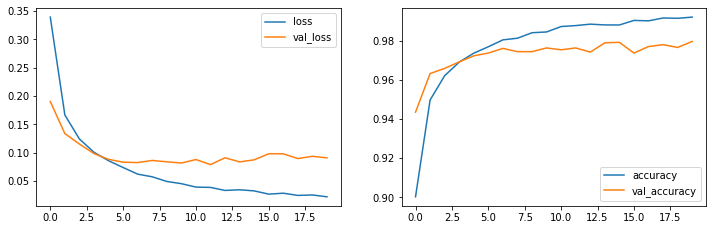

In [ ]:
#calculating accuracy

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')
plt.figure(figsize=(12, 8))

#plotting val_loss and 
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()


In [ ]:
#calculating predictions
predictions = model.predict(X_test)

#Going to Graph this to look at the full set of 10 class predictions.

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} {100*np.max(predictions_array):2.0f}% ({true_label})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#db3b56")

    ##db3b56 is a red gradient to show the prediction lesser then 100%

    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

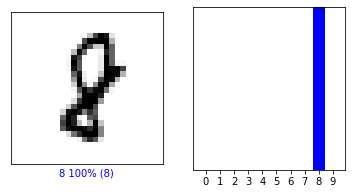

In [ ]:
#ignore this cell...
#testing the prediction

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

#the graph with blue line shows the result is 100% 8
#the correct prediction labels are in blue and the incorrect ones are in red

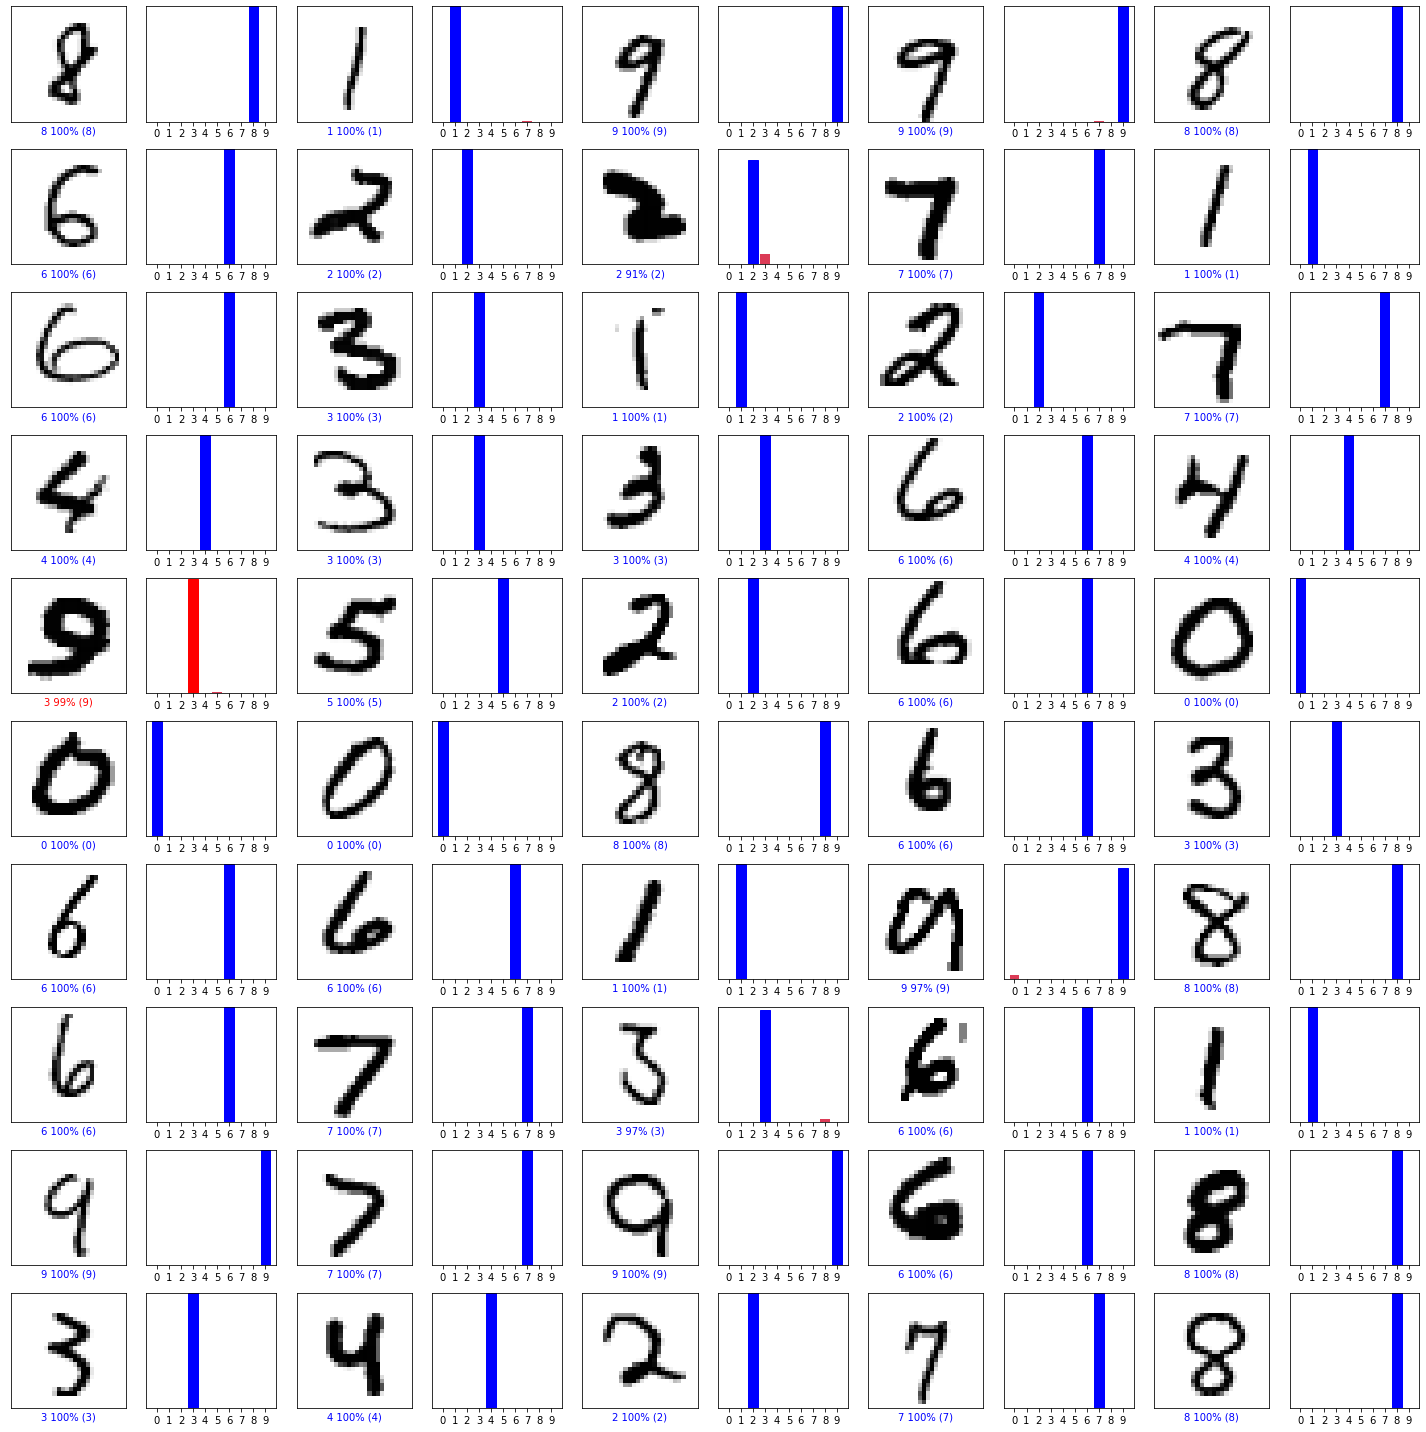

In [ ]:
#plotting several images with their predictions
num_rows = 10
num_cols = 5

num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()